In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker



In [2]:
# Define file names
pickle_files = [
    'checkpoint_both.pickle',
    'checkpoint_part1.pickle',
    'checkpoint_part2.pickle'
]

# Initialize empty lists to store data
avg_ramp_up = []
avg_ramp_down = []
t_el = None
ql_sta = None
ql_dyn = None

# Read and combine data from all pickle files
for file in pickle_files:
    with open(file, 'rb') as f:
        avg_ramp_up.extend(pickle.load(f))  # Assuming this is a list
        avg_ramp_down.extend(pickle.load(f))  # Assuming this is a list
        if t_el is None:
            t_el = pickle.load(f)
        if ql_sta is None:
            ql_sta = pickle.load(f)
        if ql_dyn is None:
            ql_dyn = pickle.load(f)

# Plot configuration
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300


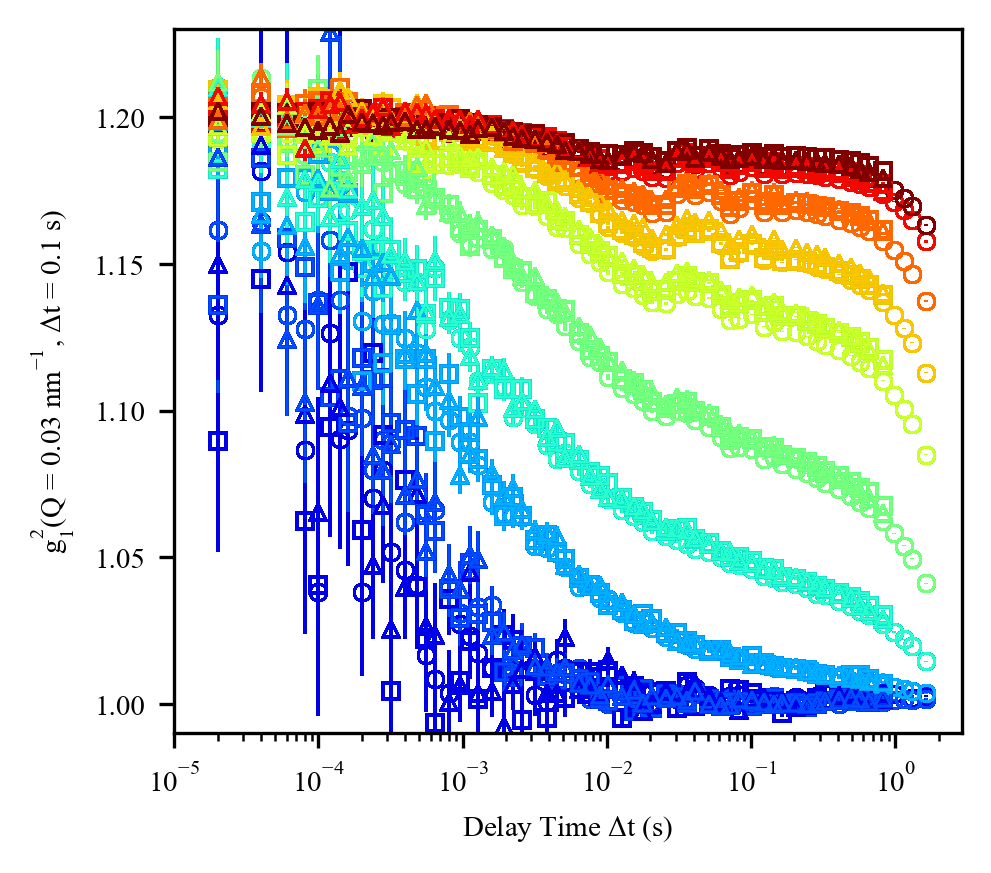

In [29]:
# Define figure width (86 mm) and convert to inches
figure_width_mm = 86
figure_width_inches = figure_width_mm / 25.4  # Convert mm to inches

# Create figure with correct aspect ratio
fig, ax = plt.subplots(1, 1, figsize=(figure_width_inches, figure_width_inches * 0.9))  # Adjust height

g2_idx = 0
total_size = sum(len(avg_dict['temperature_x']) for avg_dict in avg_ramp_up)

accu_size = 0
marker_types = ['o', 's', '^']  # Circle, Square, Triangle

# Create a mapping for temperature-based colors
unique_temps = sorted(set(temp for avg_dict in avg_ramp_up for temp in avg_dict['temperature_x']))
temp_to_color = {temp: plt.get_cmap('jet')(i / len(unique_temps)) for i, temp in enumerate(unique_temps)}

for i, avg_dict in enumerate(avg_ramp_up):
    curr_size = len(avg_dict['temperature_x'])
    idx = accu_size + np.arange(curr_size) * 1.0
    idx /= total_size
    accu_size += curr_size

    marker = marker_types[int(i/10)]  # Cycle through marker types
    
    for j, temp in enumerate(avg_dict['temperature_x']):
        color = temp_to_color[temp]


        g2_values = avg_dict['g2'][:, g2_idx]
        g2_err_values = avg_dict['g2_err'][:, g2_idx]
        min_length = min(len(t_el), len(g2_values))

        # Filter out noisy data below 1.0
        valid_idx = g2_values[:min_length] >= 0.99
        ax.errorbar(t_el[:min_length][valid_idx], g2_values[:min_length][valid_idx], 
                    yerr=g2_err_values[:min_length][valid_idx], fmt=marker, color=color, 
                    lw=0.5, ms=4, mew=0.5, mfc='none')

# Set x and y labels
ax.set_xlabel(r'Delay Time $\mathdefault{\Delta t}$ (s)', fontsize=7)
ax.set_ylabel(r'$\mathdefault{g_1^2}$(Q = 0.03 nm$\mathdefault{^{-1}}$, $\mathdefault{\Delta t}$ = 0.1 s)', fontsize=7)

# Set log scale and axis limits
ax.set_xscale('log')
ax.set_xlim(1e-5, None)  # Start x-axis from 1e-5
ax.set_ylim(0.99, 1.23)  # Set y-axis range from 0.99 to 1.23

# Ensure tick labels are also in 7 pt
ax.tick_params(axis='both', which='major', labelsize=7)

# Save the figure
plt.savefig('H02_RampUp_XPCS_combined.pdf', bbox_inches="tight", dpi=600)
plt.show()


In [16]:

len(marker_types)

3

In [20]:
len(avg_ramp_up)


30

In [27]:
3%3

0

In [30]:
int(21/30)

0